[('feel', 3555), ('like', 3489), ('know', 2201), ('life', 2041), ('time', 2017), ('get', 1914), ('year', 1836), ('want', 1833), ('really', 1637), ('thing', 1595), ('day', 1582), ('even', 1454), ('people', 1451), ('would', 1437), ('depression', 1418), ('one', 1406), ('think', 1230), ('go', 1203), ('feeling', 1191), ('friend', 1128)]
ing seems easier way much doubt ever want share experience read lot topic time
l think ruined honor locking 3 month want go back work living house live diffe
afraid tired everyday like nightmare want lose life person fell love know plea
en week really struggling experience want come home feel like need stay longer
ng promoted afford monthly rent plus want emergency saving fund live mother cl
r anybody relate advice thanks hi dr want sign two week go ahead go work dr gi
ress let honest get lot stress would want come home hurt see depression suicid
ul dreamy 3 hour ever rare feel like want want wake much better time asleep sa
eamy 3 hour ever rare feel like wa

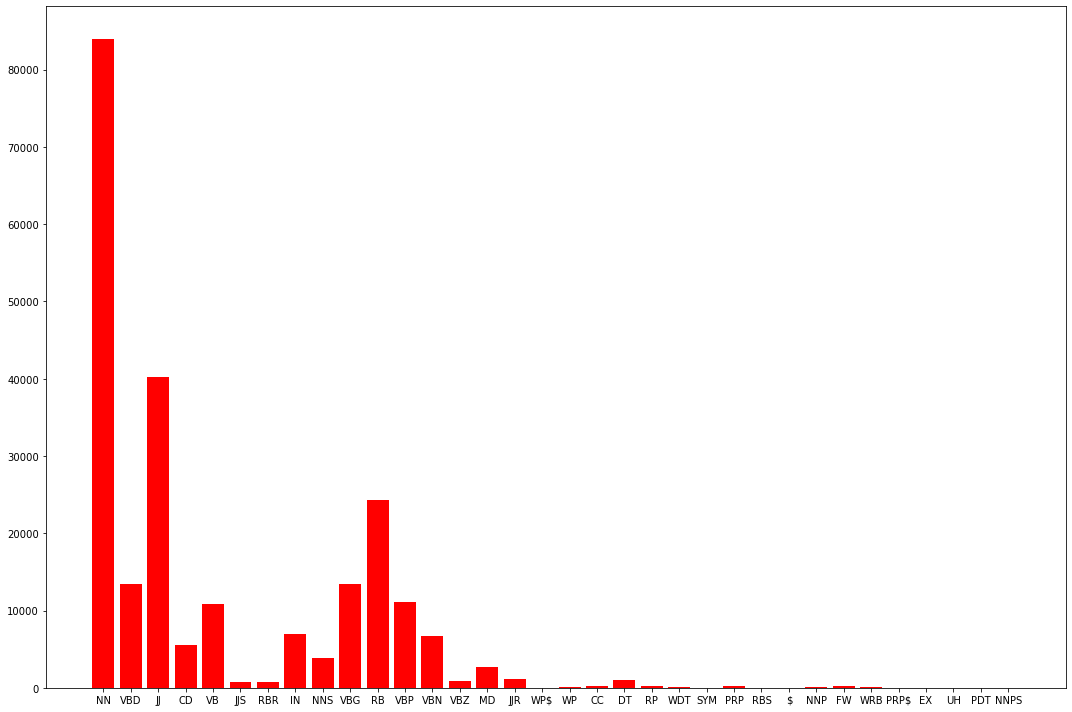

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk import FreqDist

col = ['text']
df_old = pd.read_csv('dep_forum.csv', names=col, header=None)
df = pd.DataFrame({'text': df_old['text'][1:],
                   'label': 0})
df.fillna(value='')

###tokenize title and body texts###
tokenizer = RegexpTokenizer(r'\w+')
df['text'] = df['text'].apply(lambda x: tokenizer.tokenize(str(x).lower()))


###remove stopwords###

#returns all words that aren't in the list of stopwords
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words
#had to use 'python -m nltk.downloader stopwords' from the TestEnv to make stopwords work
df['text'] = df['text'].apply(lambda x: remove_stopwords(x))


###lemmatizer -- lemmatizer maps common words back to its base###

lemmatizer = WordNetLemmatizer()

def word_lemmatizer(text):
    lem_text = [lemmatizer.lemmatize(x) for x in text]
    return lem_text
df['text'] = df['text'].apply(lambda x: word_lemmatizer(x))


###storing title and body columns as a list to feed into pos_tag###
title_list = list(df['text'])



#Text classification: pos tagging
pos_tagged_text = []

for ele in title_list:
    pos_tagged_text.append(nltk.pos_tag(ele))

    
df['pos_tagged_text'] = pos_tagged_text



###The codes below analyzes text frequency distribution, collocation, and concordance while excluding certain words###
single_w = []
exclude_list = ['nan']

def exclude(text):
    words = [w for w in text if w not in exclude_list]
    return words
df['text'] = df['text'].apply(lambda x: exclude(x))

for item in df['pos_tagged_text']:
    for tuples in item:
        if tuples[0] not in exclude_list:
            single_w.append(tuples[0])

            
fd = nltk.FreqDist(single_w)
print(fd.most_common(20))


text = nltk.Text(single_w)
concordance_list = text.concordance_list("want", lines=20)
for entry in concordance_list:
    print(entry.line)
finder = nltk.collocations.QuadgramCollocationFinder.from_words(text)
print(finder)
print(finder.ngram_fd.most_common(20))


'''creating a dictionary to store counts of unique POS tags''' 
pos_list = []
for row in df['pos_tagged_text']:
    for tup in row:
        if tup[1] not in pos_list:
            pos_list.append(tup[1])
            
pos_dict = {}
for item in pos_list:
    pos_dict[item] = 0
    for row in df['pos_tagged_text']:
        for tup in row:
            if tup[1] == item:
                pos_dict[item] += 1
                

'''Plotting the counts'''
%matplotlib inline

fig = plt.figure(figsize=(15,10))
plt.bar(pos_dict.keys(), pos_dict.values(), color='red')
plt.tight_layout()
plt.savefig("pos_dist.png", dpi=300)
plt.show()

    
df_new = pd.DataFrame({'text': df['text'],
                       'label': 0})


df_new.to_csv('dep_forum_clean.csv', index=False)


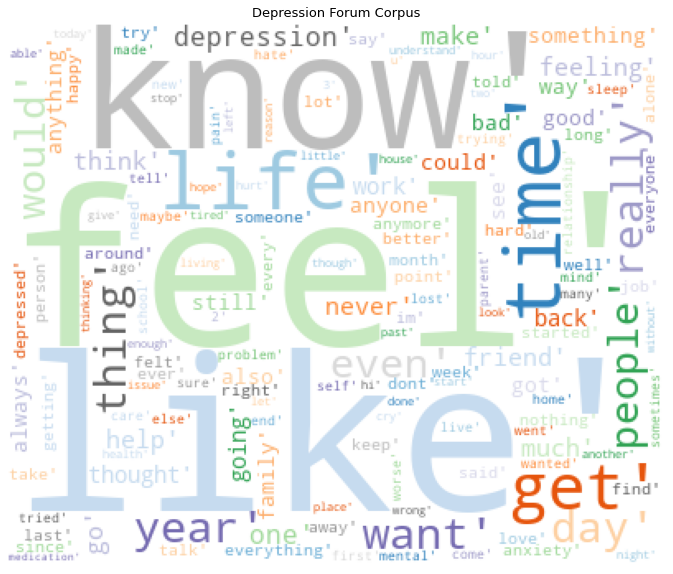

In [46]:
from wordcloud import WordCloud, ImageColorGenerator
'''defining method to generate a WordCloud'''
def generate_wordcloud(data, title):
    cloud = WordCloud(width=400,
                      height=330,
                      max_words=150,
                      colormap='tab20c',
                      stopwords=exclude_list,
                      collocations=False,
                      background_color='white'
                     ).generate_from_text(data)
    plt.figure(figsize=(14,10))
    plt.imshow(cloud)
    plt.axis('off')
    plt.title(title, fontsize=13)
    plt.savefig("wordcloud.png", dpi=300)
    plt.show()
    
generate_wordcloud(str(single_w), 'Depression Forum Corpus')

In [45]:
df_new.head()

,text,label
1.0,"[saw, today, wanted, share]",0
2.0,"[understand, situation, permanent, one, sure, ...",0
3.0,"[suicidal, thought, really, common, something,...",0
4.0,"[want, share, experience, read, lot, topic, ti...",0
5.0,"[article, talk, depressive, wear, smile, get, ...",0


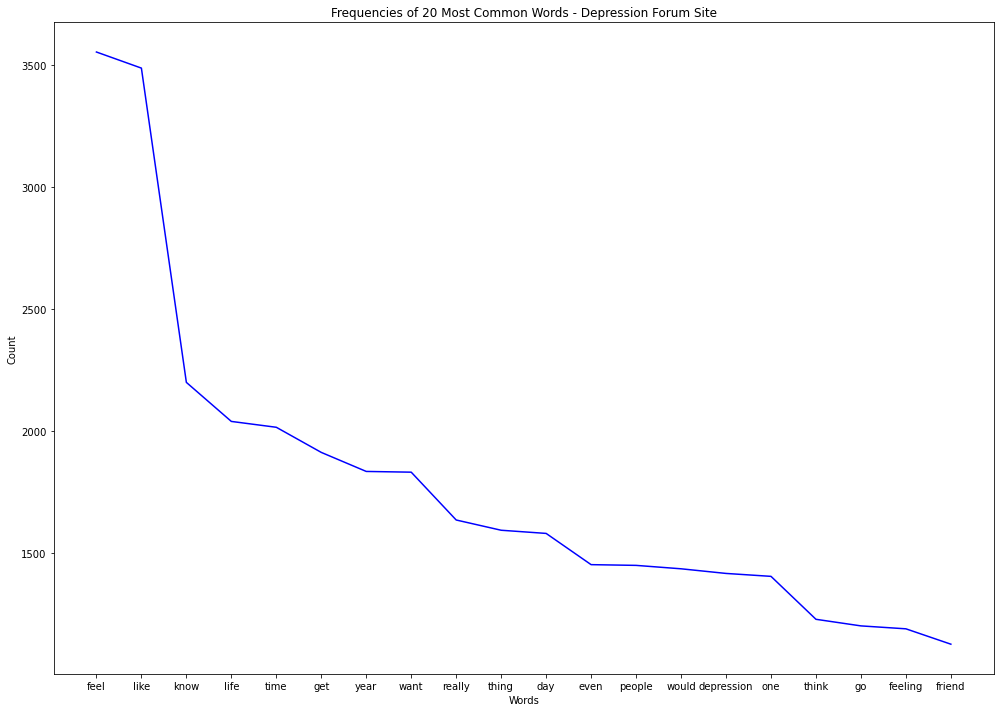

<Figure size 432x288 with 0 Axes>

In [52]:
top_20 = []
w_freq = fd.most_common(20)
%matplotlib inline
freq_dist = dict(w_freq)
fig = plt.figure(figsize=(14,10))
plt.plot(freq_dist.keys(), freq_dist.values(), color='blue')
plt.title("Frequencies of 20 Most Common Words - Depression Forum Site")
plt.xlabel("Words")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

plt.savefig('forum.png', dpi=300)